 ###                            Development of a predicting model for kiln inlet temperature

##### We have a process data set which consists for different parameters like kiln main drive, kiln feed, clinker rate, kiln inlet gas analysis(CO, O2 and NOx). We also have various other parameters like cooler fan flow rates PH fan outlet temperature.

In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report

In [2]:
# importing dataset
df= pd.read_csv('kiln_process.csv')

#### Data Pattren analysis

In [3]:
# head of data set
df.head()

Time  Main drive  kiln feed  Kiln Clinker  kiln fuel  PC fuel  \
0  19.07.2020 10:00         122     135.51            82       2549     4576   
1  19.07.2020 11:00         119     135.52            82       2538     4558   
2  19.07.2020 12:00         120     135.55            82       2524     4547   
3  19.07.2020 13:00         116     136.08            82       2514     4547   
4  19.07.2020 14:00         114     136.60            83       2500     4556   

    RPM  Kiln CO  Kiln NOX  Kiln O2  ...  2nd Air  C.Fan1  C.Fan2  C.Fan3  \
0  2.90     0.01   1230.43     4.16  ...  1001.05    7.58    9.07    6.58   
1  2.90     0.00   1411.04     4.44  ...   997.56    7.37    9.03    6.65   
2  2.90     0.00   1562.30     5.40  ...  1000.77    7.22    8.98    6.69   
3  2.90     0.00   1597.24     5.99  ...   997.89    7.33    9.08    6.77   
4  2.85     0.00   1434.92     6.17  ...   999.56    7.44    9.10    6.70   

   C.Fan4  C.Fan5  C.Fan6  C.Grate  PH Fan Out Temp  Unnamed: 33  
0    7.75    7.15    6.33    10.43           327.66          NaN  
1    8.03    7.64    6.64     8.91           326.72          NaN  
2    8.12    7.83    6.75     8.25           326.42          NaN  
3    8.14    7.83    6.75     7.43           323.42          NaN  
4    8.02    7.74    6.70     9.69           322.17          NaN  

[5 rows x 34 columns]

###### I found out the total number of rows and columns in the data set using “.shape

In [13]:
df.shape

(182, 27)

###### know the columns and their corresponding data types,along with finding whether they contain null values or not

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Main drive         182 non-null    int64  
 1   kiln feed          182 non-null    float64
 2   Kiln Clinker       182 non-null    int64  
 3   kiln fuel          182 non-null    int64  
 4   PC fuel            182 non-null    int64  
 5   RPM                182 non-null    float64
 6   Kiln CO            182 non-null    float64
 7   Kiln NOX           182 non-null    float64
 8   Kiln O2            182 non-null    float64
 9   Kiln SO2           182 non-null    float64
 10  PHCO               182 non-null    float64
 11  PH O2              182 non-null    float64
 12  PH SO2             182 non-null    float64
 13  PH NOX             182 non-null    float64
 14  Inlet Kiln temp    182 non-null    int64  
 15  5 Cyc OL           182 non-null    int64  
 16  4 Cyc OL           182 non

Data has only float and integer values.
No variable column has null/missing values.

##### The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [16]:
df.describe()

Main drive   kiln feed  Kiln Clinker    kiln fuel      PC fuel  \
count  182.000000  182.000000    182.000000   182.000000   182.000000   
mean   115.868132  121.447912     73.675824  2454.126374  4112.186813   
std      7.209890   17.269216     10.471185   103.001424   600.485778   
min    102.000000   88.660000     54.000000  2039.000000  2717.000000   
25%    110.000000  106.742500     65.000000  2400.000000  3683.250000   
50%    115.500000  130.570000     79.000000  2500.000000  4442.000000   
75%    121.000000  133.822500     81.000000  2513.500000  4557.750000   
max    137.000000  136.600000     83.000000  2597.000000  4628.000000   

              RPM     Kiln CO     Kiln NOX     Kiln O2    Kiln SO2  ...  \
count  182.000000  182.000000   182.000000  182.000000  182.000000  ...   
mean     2.542912    0.021923  1066.083022    4.862912   78.761209  ...   
std      0.422196    0.048856   324.091135    2.813973   57.650431  ...   
min      1.810000    0.000000   -46.140000    0.660000   65.010000  ...   
25%      2.180000    0.000000   889.520000    3.890000   67.935000  ...   
50%      2.785000    0.010000  1063.260000    4.510000   68.940000  ...   
75%      2.850000    0.020000  1286.385000    5.197500   70.317500  ...   
max      2.970000    0.400000  1767.180000   21.050000  700.530000  ...   

       PH_Outlet Temp  Burning Zone Temp  Ter Air pr     Ter Air     2nd Air  \
count      182.000000         182.000000  182.000000  182.000000   182.00000   
mean       333.862637        1184.085110   -2.665000  801.656813   950.63967   
std         11.076222         191.888094    0.419925   44.699903    38.01313   
min        318.000000        1000.000000   -3.650000  707.420000   856.29000   
25%        326.000000        1000.000000   -2.990000  771.897500   925.72000   
50%        329.000000        1134.450000   -2.665000  815.585000   947.99500   
75%        341.000000        1405.795000   -2.372500  835.472500   979.97500   
max        361.000000        1483.730000   -1.520000  898.650000  1044.04000   

           C.Fan1      C.Fan5      C.Fan6     C.Grate  PH Fan Out Temp  
count  182.000000  182.000000  182.000000  182.000000       182.000000  
mean     7.531538    7.126758    6.081703    8.256923       334.606813  
std      0.162776    0.440947    0.620649    1.480016        10.953035  
min      7.060000    5.280000    3.580000    5.790000       318.380000  
25%      7.412500    6.950000    6.040000    7.047500       327.145000  
50%      7.525000    7.160000    6.280000    8.870000       329.635000  
75%      7.650000    7.400000    6.430000    9.100000       341.637500  
max      7.930000    7.830000    6.750000   11.520000       361.100000  

[8 rows x 27 columns]

There is a significant difference in minimum and maximum values

### Data cleaning

In [4]:
# droping time column as it is not required for model development
df= df.drop(['Time'], axis = 1)

In [5]:
df= df.drop(['Unnamed: 33'], axis = 1)

In [6]:
df.head()

Main drive  kiln feed  Kiln Clinker  kiln fuel  PC fuel   RPM  Kiln CO  \
0         122     135.51            82       2549     4576  2.90     0.01   
1         119     135.52            82       2538     4558  2.90     0.00   
2         120     135.55            82       2524     4547  2.90     0.00   
3         116     136.08            82       2514     4547  2.90     0.00   
4         114     136.60            83       2500     4556  2.85     0.00   

   Kiln NOX  Kiln O2  Kiln SO2  ...  Ter Air  2nd Air  C.Fan1  C.Fan2  C.Fan3  \
0   1230.43     4.16     65.52  ...   842.97  1001.05    7.58    9.07    6.58   
1   1411.04     4.44     65.01  ...   823.51   997.56    7.37    9.03    6.65   
2   1562.30     5.40     65.68  ...   796.93  1000.77    7.22    8.98    6.69   
3   1597.24     5.99     65.81  ...   791.53   997.89    7.33    9.08    6.77   
4   1434.92     6.17     65.93  ...   805.23   999.56    7.44    9.10    6.70   

   C.Fan4  C.Fan5  C.Fan6  C.Grate  PH Fan Out Temp  
0    7.75    7.15    6.33    10.43           327.66  
1    8.03    7.64    6.64     8.91           326.72  
2    8.12    7.83    6.75     8.25           326.42  
3    8.14    7.83    6.75     7.43           323.42  
4    8.02    7.74    6.70     9.69           322.17  

[5 rows x 32 columns]

##### To understand relation among the data we need to determine correlation among them. for this purpose we will plot a correlation plot

### Exploratory data analysis

In [7]:
df.corr()

Main drive  kiln feed  Kiln Clinker  kiln fuel   PC fuel  \
Main drive           1.000000  -0.280607     -0.282608  -0.323116 -0.251462   
kiln feed           -0.280607   1.000000      0.999654   0.863651  0.981611   
Kiln Clinker        -0.282608   0.999654      1.000000   0.864425  0.981173   
kiln fuel           -0.323116   0.863651      0.864425   1.000000  0.835722   
PC fuel             -0.251462   0.981611      0.981173   0.835722  1.000000   
RPM                 -0.302798   0.987469      0.987841   0.860476  0.969261   
Kiln CO              0.023467  -0.209839     -0.208180  -0.033556 -0.187028   
Kiln NOX             0.115187  -0.310791     -0.310656  -0.363247 -0.212352   
Kiln O2              0.061886   0.003406      0.000437   0.009448 -0.062755   
Kiln SO2            -0.166701   0.060730      0.061906   0.102976  0.067261   
PHCO                -0.332115   0.527842      0.527193   0.452707  0.459401   
PH O2                0.258999  -0.957211     -0.957532  -0.851062 -0.965022   
PH SO2               0.402649  -0.798459     -0.801574  -0.834112 -0.753257   
PH NOX               0.282311  -0.472013     -0.474156  -0.474929 -0.411040   
Kiln Hood            0.040823  -0.040741     -0.039770  -0.031996 -0.049838   
Kiln Inlet          -0.030120  -0.223935     -0.227451  -0.211128 -0.212518   
Inlet Kiln temp      0.710981  -0.573593     -0.575822  -0.508529 -0.596134   
5 Cyc OL             0.397015   0.339197      0.340862   0.250883  0.369137   
4 Cyc OL             0.303309   0.585461      0.584863   0.456420  0.614339   
PH_Outlet Temp       0.338078  -0.951814     -0.951674  -0.846816 -0.913672   
Burning Zone Temp    0.286403  -0.788607     -0.789105  -0.727235 -0.729416   
Ter Air pr           0.097081  -0.748110     -0.748652  -0.565593 -0.733328   
Ter Air             -0.224661   0.829330      0.829303   0.713693  0.758112   
2nd Air             -0.063108   0.522122      0.522384   0.329064  0.521758   
C.Fan1              -0.179705   0.469522      0.470074   0.453042  0.443712   
C.Fan2              -0.012832   0.043265      0.043323   0.080568  0.030478   
C.Fan3               0.018086   0.195216      0.194466   0.038930  0.227626   
C.Fan4               0.012842   0.271370      0.270311  -0.005377  0.345005   
C.Fan5              -0.079901   0.515955      0.516057   0.267436  0.575500   
C.Fan6              -0.163171   0.798396      0.797344   0.499295  0.836965   
C.Grate             -0.242929   0.852846      0.853542   0.718815  0.822736   
PH Fan Out Temp      0.336648  -0.949828     -0.949513  -0.839033 -0.911124   

                        RPM   Kiln CO  Kiln NOX   Kiln O2  Kiln SO2  ...  \
Main drive        -0.302798  0.023467  0.115187  0.061886 -0.166701  ...   
kiln feed          0.987469 -0.209839 -0.310791  0.003406  0.060730  ...   
Kiln Clinker       0.987841 -0.208180 -0.310656  0.000437  0.061906  ...   
kiln fuel          0.860476 -0.033556 -0.363247  0.009448  0.102976  ...   
PC fuel            0.969261 -0.187028 -0.212352 -0.062755  0.067261  ...   
RPM                1.000000 -0.193821 -0.317362 -0.021445  0.070119  ...   
Kiln CO           -0.193821  1.000000 -0.087469 -0.295673  0.616472  ...   
Kiln NOX          -0.317362 -0.087469  1.000000 -0.437414 -0.166144  ...   
Kiln O2           -0.021445 -0.295673 -0.437414  1.000000 -0.165938  ...   
Kiln SO2           0.070119  0.616472 -0.166144 -0.165938  1.000000  ...   
PHCO               0.525757  0.103346 -0.511210 -0.105922  0.242613  ...   
PH O2             -0.962605  0.103497  0.270137  0.021619 -0.098218  ...   
PH SO2            -0.832888  0.092578  0.426960  0.019768 -0.085599  ...   
PH NOX            -0.488818 -0.219381  0.785781  0.131452 -0.268319  ...   
Kiln Hood         -0.042954  0.136937 -0.053821 -0.087261  0.163834  ...   
Kiln Inlet        -0.231585  0.120545  0.104023  0.061656 -0.012357  ...   
Inlet Kiln temp   -0.587775  0.019893 -0.063778  0.331390 -0.254243  ...   
5 Cyc OL           0.340678  0.331090 -0.17

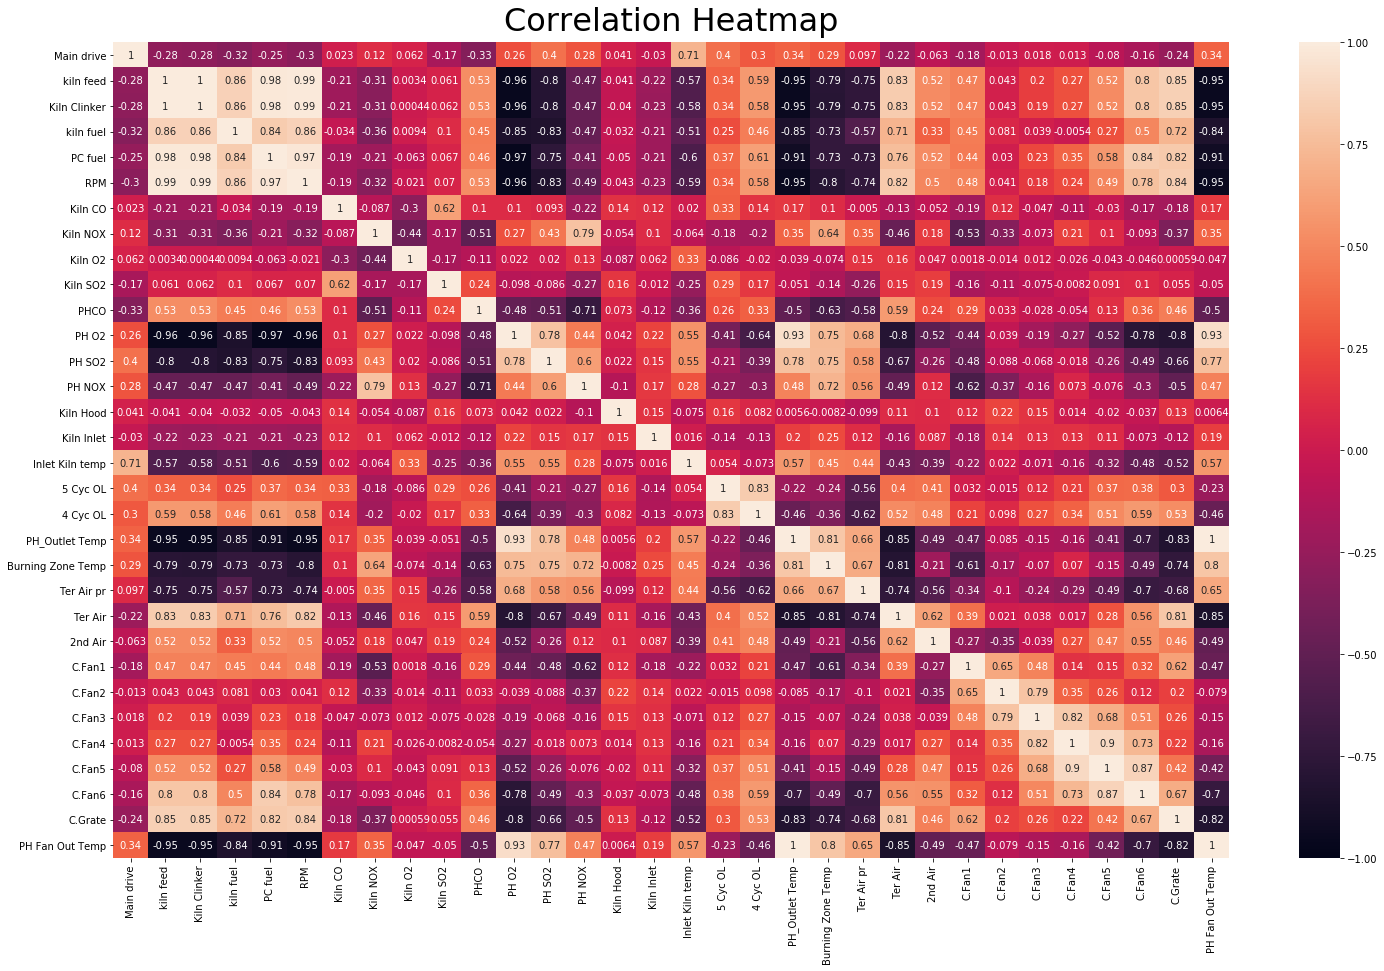

In [8]:
plt.figure(figsize=(25,15))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':32}, pad=12);

#### from the above plot the following process parameters can be ignored like C.fan2, C.fan3, C.fan4, kiln hood and kiln inlet pressure

In [9]:
### droping the columns not required
df= df.drop(['C.Fan2', 'C.Fan3'], axis = 1)

In [10]:
df= df.drop(['C.Fan4','Kiln Hood','Kiln Inlet'],axis=1)

In [11]:
df.head()

Main drive  kiln feed  Kiln Clinker  kiln fuel  PC fuel   RPM  Kiln CO  \
0         122     135.51            82       2549     4576  2.90     0.01   
1         119     135.52            82       2538     4558  2.90     0.00   
2         120     135.55            82       2524     4547  2.90     0.00   
3         116     136.08            82       2514     4547  2.90     0.00   
4         114     136.60            83       2500     4556  2.85     0.00   

   Kiln NOX  Kiln O2  Kiln SO2  ...  PH_Outlet Temp  Burning Zone Temp  \
0   1230.43     4.16     65.52  ...             327            1030.05   
1   1411.04     4.44     65.01  ...             326            1302.02   
2   1562.30     5.40     65.68  ...             326            1335.63   
3   1597.24     5.99     65.81  ...             323            1336.44   
4   1434.92     6.17     65.93  ...             322            1313.57   

   Ter Air pr  Ter Air  2nd Air  C.Fan1  C.Fan5  C.Fan6  C.Grate  \
0       -3.07   842.97  1001.05    7.58    7.15    6.33    10.43   
1       -2.99   823.51   997.56    7.37    7.64    6.64     8.91   
2       -2.66   796.93  1000.77    7.22    7.83    6.75     8.25   
3       -2.55   791.53   997.89    7.33    7.83    6.75     7.43   
4       -2.58   805.23   999.56    7.44    7.74    6.70     9.69   

   PH Fan Out Temp  
0           327.66  
1           326.72  
2           326.42  
3           323.42  
4           322.17  

[5 rows x 27 columns]

ValueError: num must be 1 <= num <= 8, not 9

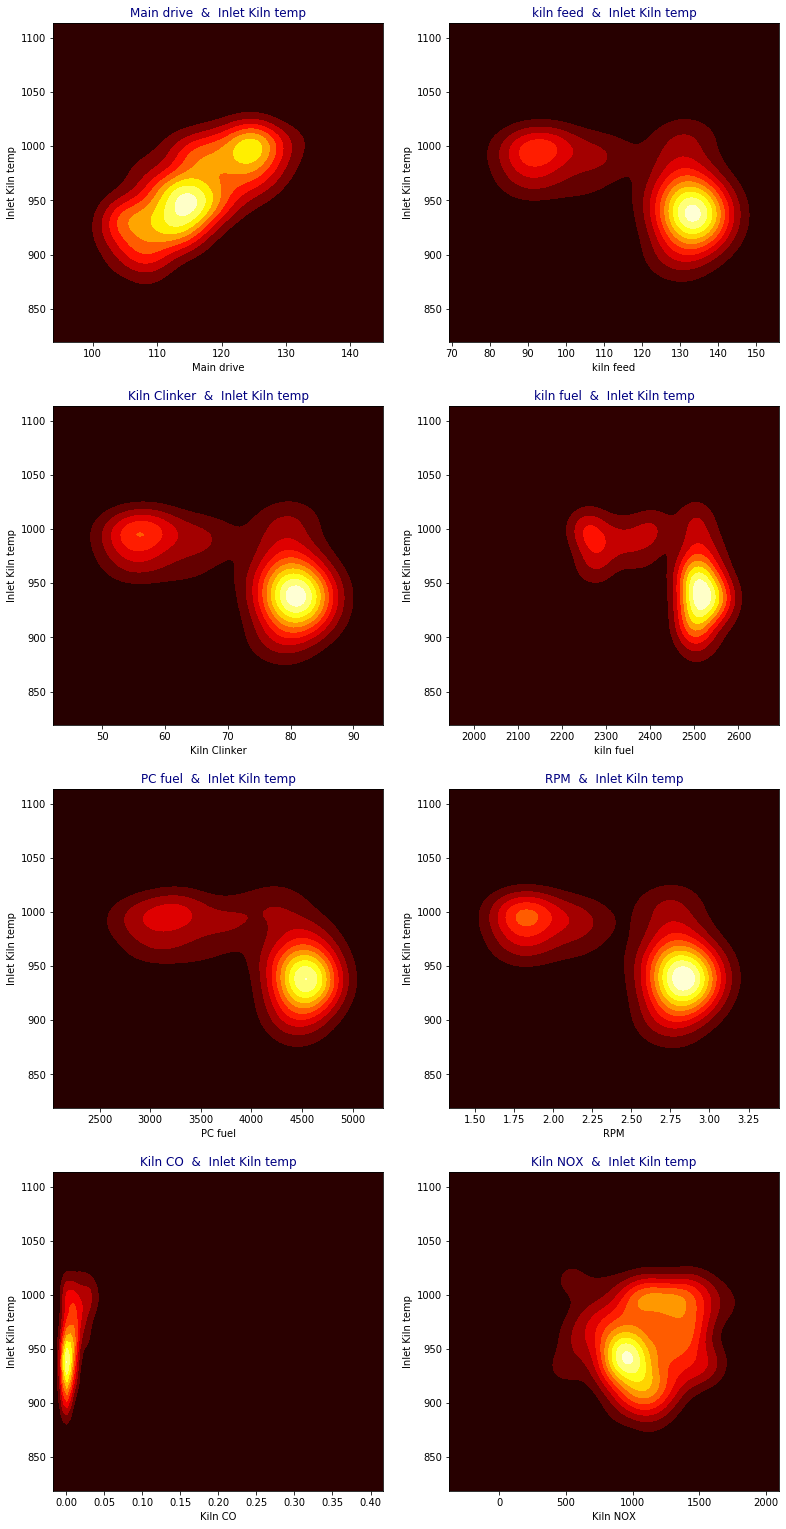

In [14]:
import itertools
cols=[i for i in df.columns if i not in 'Inlet Kiln temp']
length=len(cols)
plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(df[i],
                df["Inlet Kiln temp"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  Inlet Kiln temp",color="navy")

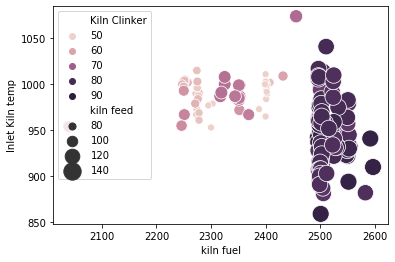

In [15]:
sns.scatterplot(y="Inlet Kiln temp",x="kiln fuel",hue="Kiln Clinker", 
    size="kiln feed",data=df,sizes=(50,300))
plt.show()

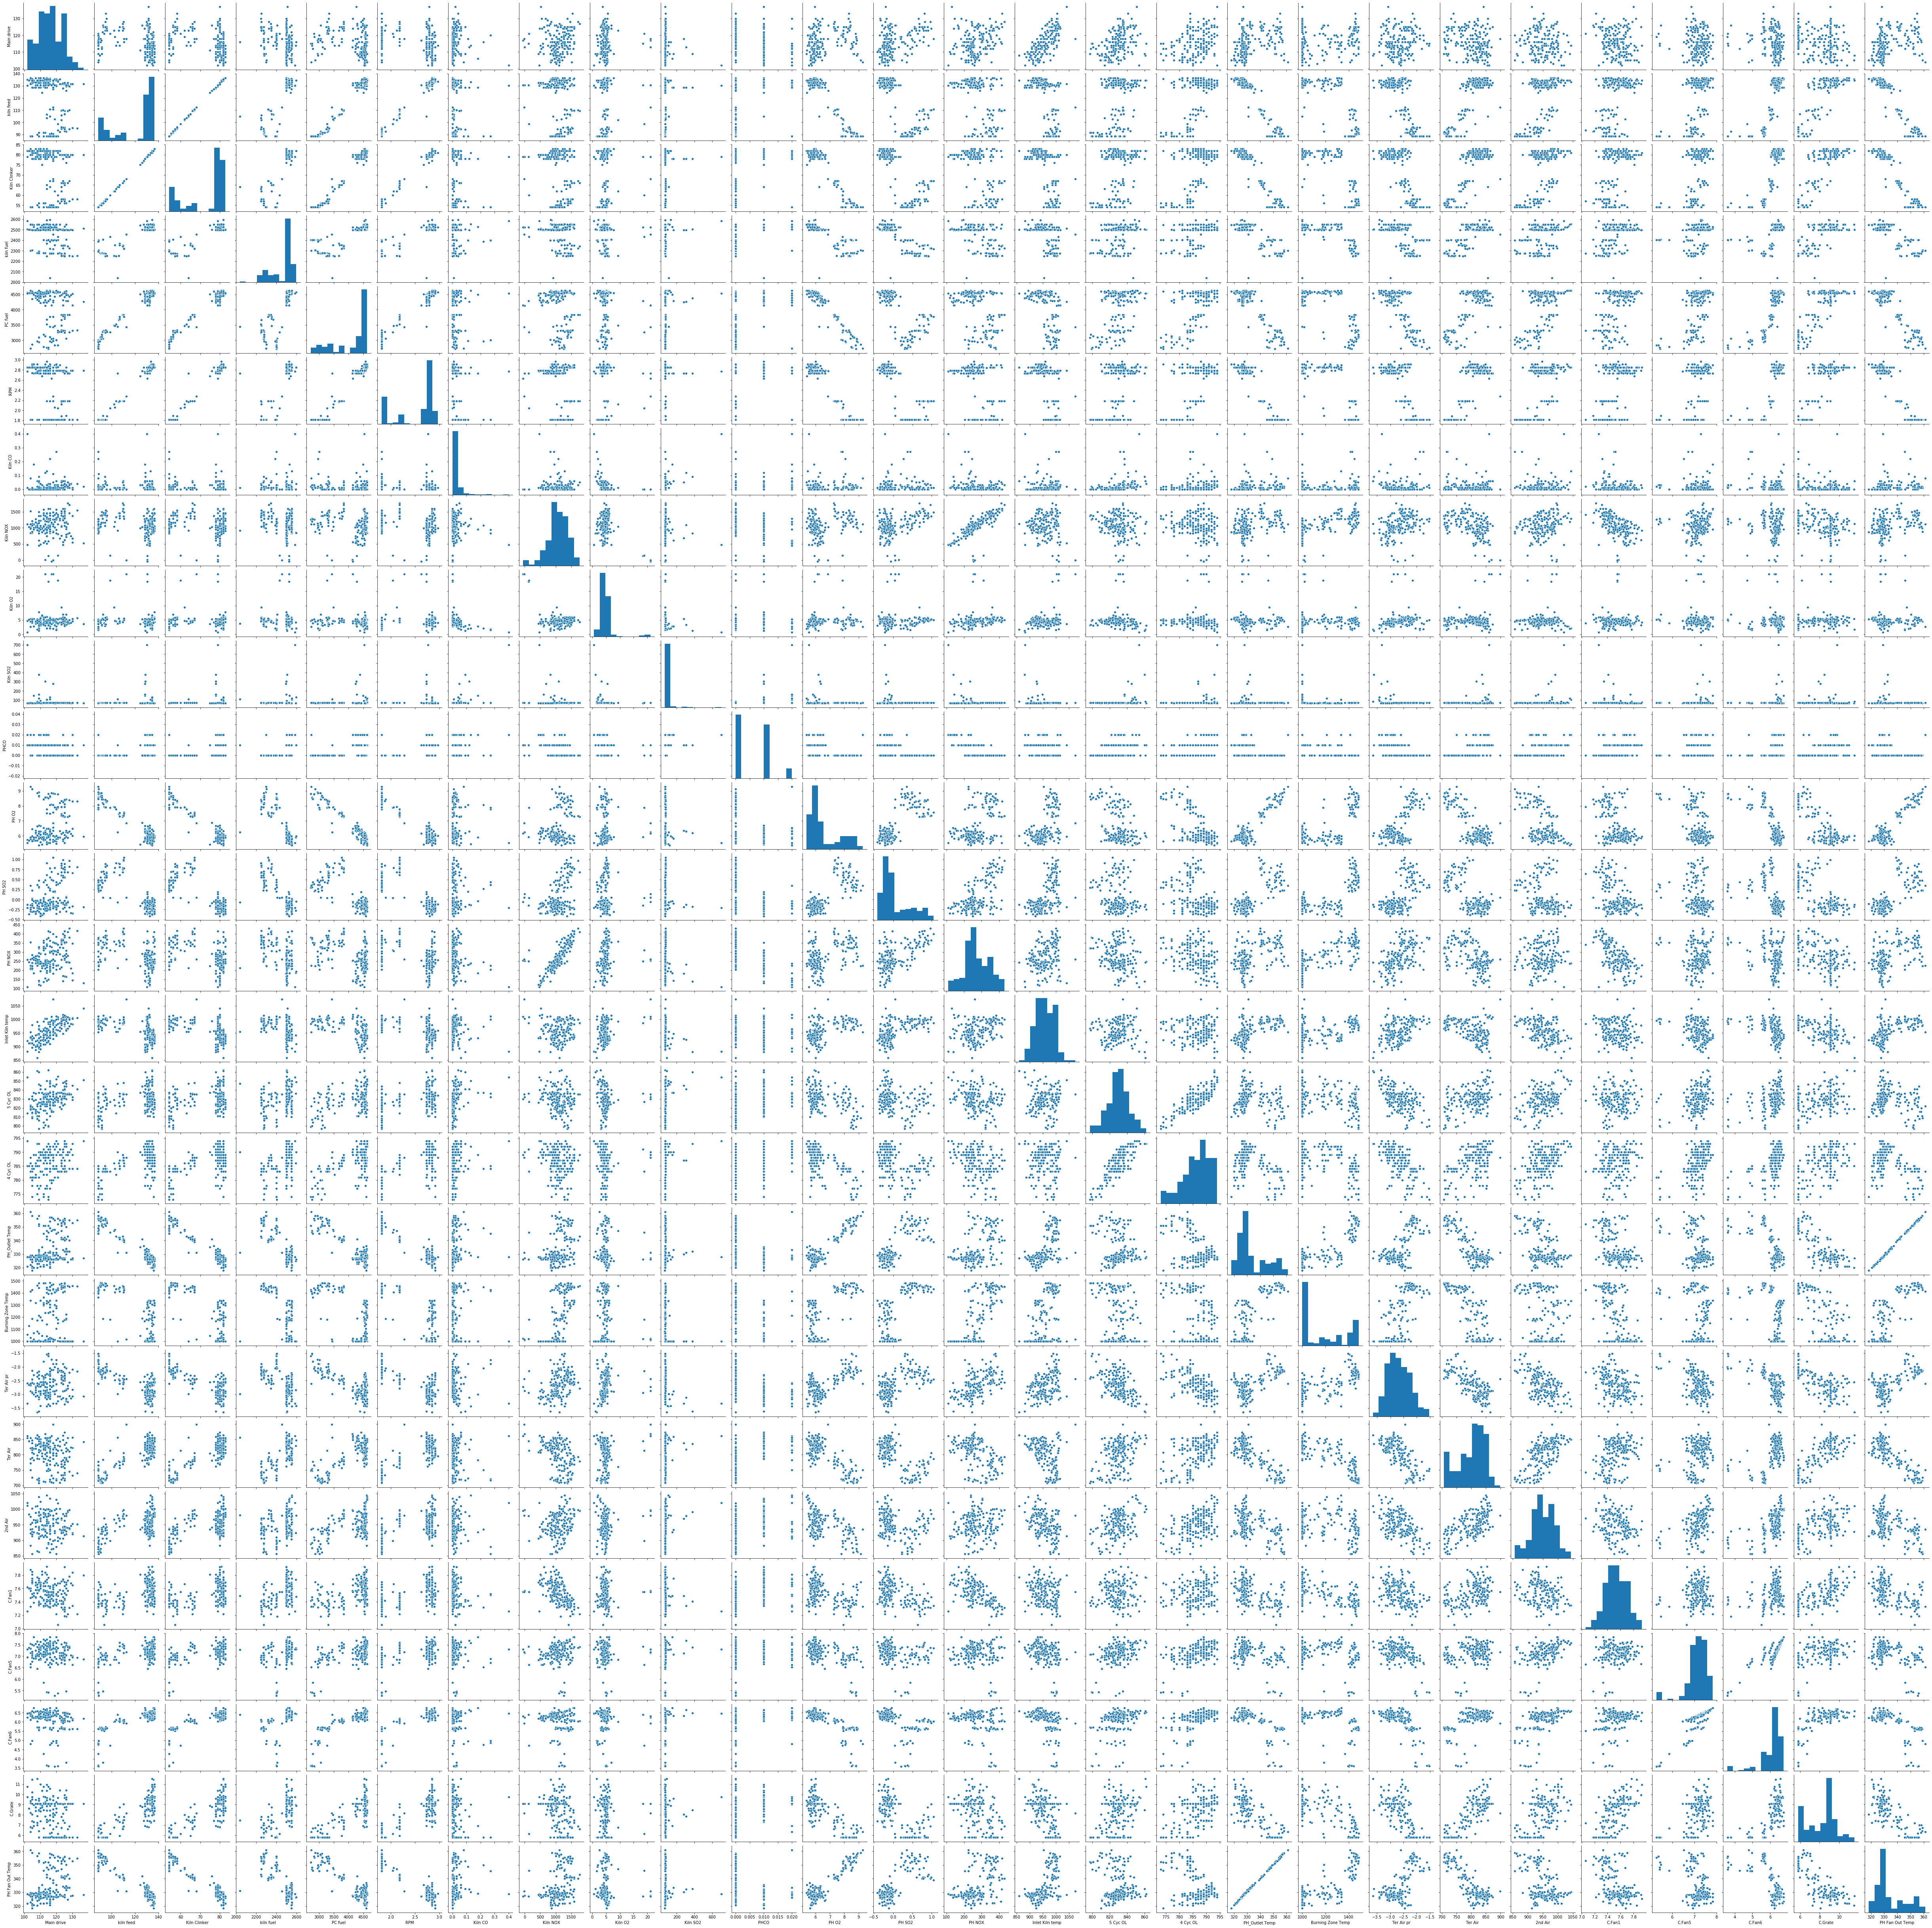

In [17]:
sns.pairplot(df)

# Developing machine Learning models

#### Now drop the dependent variable from the data set

In [16]:
X=df.drop("Inlet Kiln temp",axis=1)
y=df["Inlet Kiln temp"]

### Splitting the data set into train and test data

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.2, random_state=2)

### Applying standard scalar to reduce the dimensonality of the data set

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### since our data set is regression data so we will apply various regression machine learning models and see its RMSE value and R2 value to see which model best fits the data set

In [19]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr=LinearRegression()
lasso = Lasso()
ridge = Ridge()
lr.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
ridge.fit(X_train, y_train)

Ridge()

In [20]:
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_ridge = ridge.predict(X_test) 

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Model\t\t\t RMSE \t\t R2") 
print("""LinearRegression \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr))) 
print("""LassoRegression \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 R2
LinearRegression 	 16.25 		0.82
LassoRegression 	 18.31 		0.77
RidgeRegression 	 16.23 		0.82


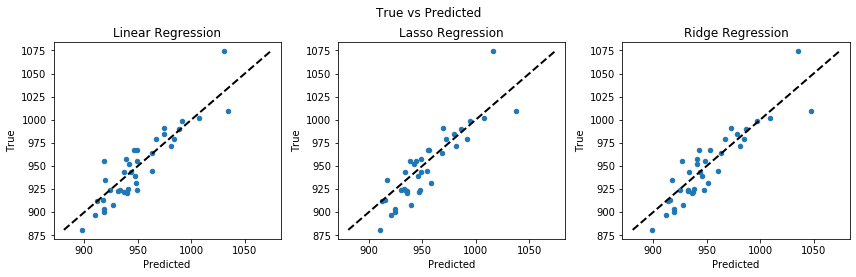

In [22]:
fig,(ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))
ax1.scatter(y_pred_lr, y_test, s=20) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Linear Regression") 
ax2.scatter(y_pred_lasso, y_test, s=20) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("True") 
ax2.set_xlabel("Predicted") 
ax2.set_title("Lasso Regression") 
ax3.scatter(y_pred_ridge, y_test, s=20) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True") 
ax3.set_xlabel("Predicted") 
ax3.set_title("Ridge Regression") 
fig.suptitle("True vs Predicted") 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Model				 RMSE 		 R2
Decision Tree Regressor 	 18.47 		0.77


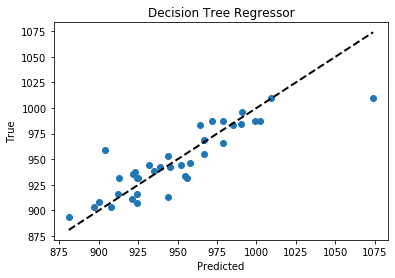

In [23]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(X_train, y_train) 
y_pred_dtr = dtr.predict(X_test) 
print("Model\t\t\t\t RMSE \t\t R2") 
print("""Decision Tree Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_dtr)), r2_score(y_test, y_pred_dtr))) 
plt.scatter(y_test, y_pred_dtr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Decision Tree Regressor") 
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

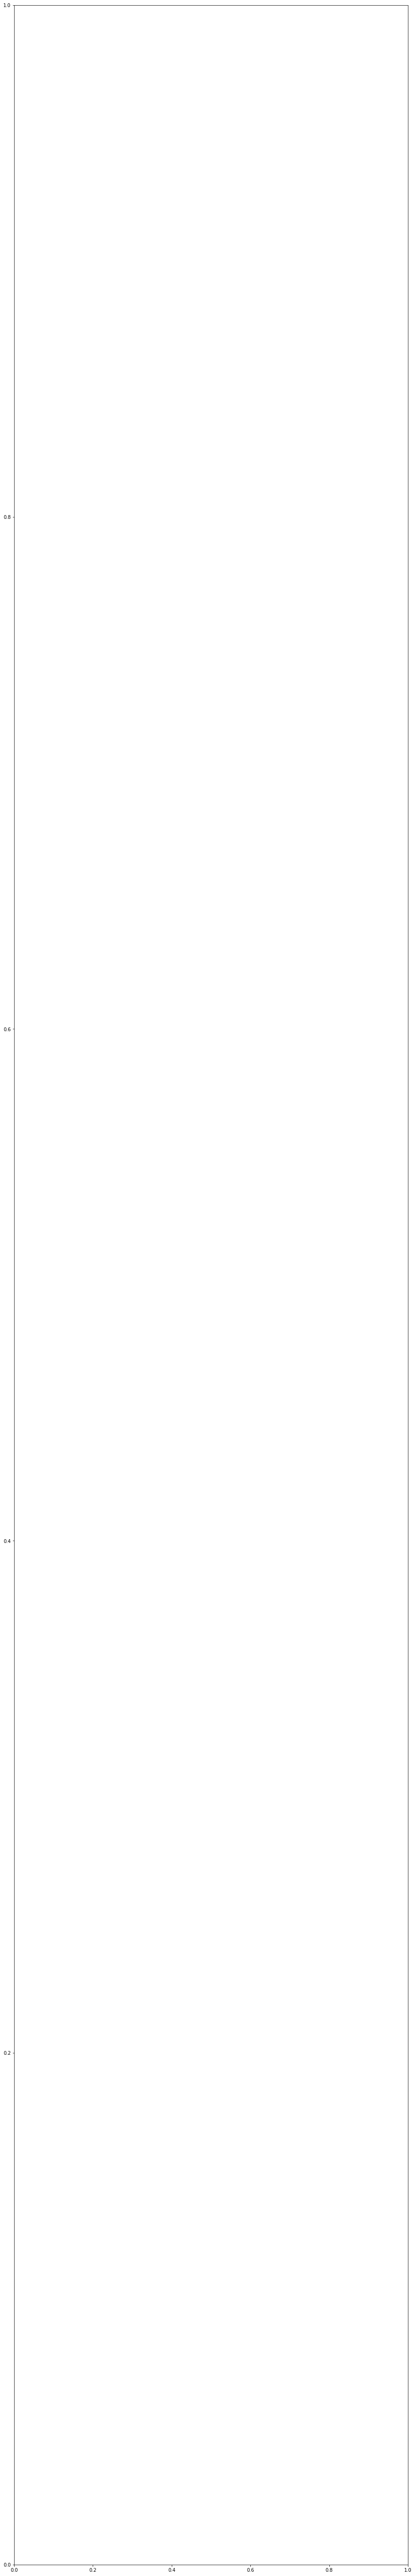

In [26]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
ranking = np.argsort(-rfr.feature_importances_)
f, ax = plt.subplots(figsize=(15, 100))
sns.barplot(x=rfr.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

Model				 RMSE 		 R2
Random Forest Regressor 	 16.44 		0.81


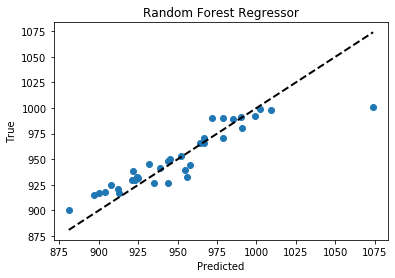

In [25]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(X_train, y_train) 
y_pred_rfr = rfr.predict(X_test) 
print("Model\t\t\t\t RMSE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_rfr)), r2_score(y_test, y_pred_rfr))) 
plt.scatter(y_test, y_pred_rfr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Random Forest Regressor") 
plt.show()

Model				 RMSE 		 R2
Gradient Boosting Regressor 	 15.90 		0.83


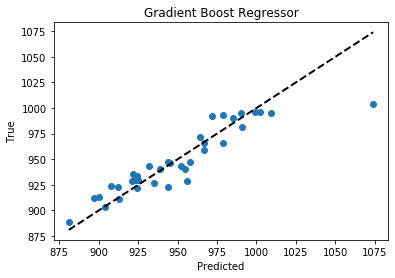

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train) 
y_pred_gbr = gbr.predict(X_test) 
print("Model\t\t\t\t RMSE \t\t R2")
print("""Gradient Boosting Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_gbr)), r2_score(y_test, y_pred_gbr))) 
plt.scatter(y_test, y_pred_gbr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Gradient Boost Regressor") 
plt.show()

In [28]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr =XGBRegressor()
xgr.fit(X_train, y_train) 
y_pred_xgr = xgr.predict(X_test) 
print("Model\t\t\t\t RMSE \t\t R2")
print("""XG Boosting Regressor \t\t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_xgr)), r2_score(y_test, y_pred_xgr))) 

Model				 RMSE 		 R2
XG Boosting Regressor 		 16.97 		0.80


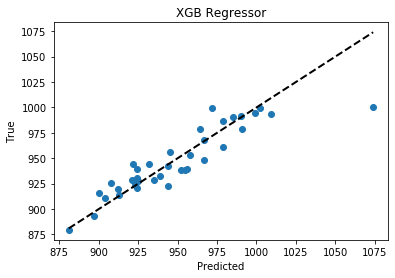

In [29]:
plt.scatter(y_test, y_pred_xgr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("XGB Regressor") 
plt.show()

In [31]:
from keras.layers import Dense, Activation
from keras.models import Sequential

In [32]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 26))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

In [33]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [34]:
model.fit(X_train, y_train, batch_size = 200, epochs = 2550)

Epoch 1/2550
1/1 [==============================] - 0s 14ms/step - loss: 923160.8125
Epoch 2/2550
1/1 [==============================] - 0s 3ms/step - loss: 923026.0000
Epoch 3/2550
1/1 [==============================] - 0s 3ms/step - loss: 922891.6875
Epoch 4/2550
1/1 [==============================] - 0s 3ms/step - loss: 922758.3750
Epoch 5/2550
1/1 [==============================] - 0s 2ms/step - loss: 922627.6875
Epoch 6/2550
1/1 [==============================] - 0s 3ms/step - loss: 922499.3125
Epoch 7/2550
1/1 [==============================] - 0s 3ms/step - loss: 922373.2500
Epoch 8/2550
1/1 [==============================] - 0s 3ms/step - loss: 922250.1250
Epoch 9/2550
1/1 [==============================] - 0s 5ms/step - loss: 922128.1250
Epoch 10/2550
1/1 [==============================] - 0s 4ms/step - loss: 922005.1875
Epoch 11/2550
1/1 [==============================] - 0s 3ms/step - loss: 921882.8750
Epoch 12/2550
1/1 [==============================] - 0s 3ms/step - loss: 

In [35]:
y_pred_ann = model.predict(X_test)

In [36]:
print("Model\t RMSE \t\t R2")
print("""ann \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_ann)), r2_score(y_test, y_pred_ann))) 

Model	 RMSE 		 R2
ann 	 65.94 		-1.98


In [37]:
from pandas import DataFrame,Series
RSME_score=[np.sqrt(mean_squared_error(y_test, y_pred_lr)),np.sqrt(mean_squared_error(y_test, y_pred_lasso)),np.sqrt(mean_squared_error(y_test, y_pred_ridge)),np.sqrt(mean_squared_error(y_test, y_pred_dtr)), np.sqrt(mean_squared_error(y_test, y_pred_rfr)),np.sqrt(mean_squared_error(y_test, y_pred_gbr)),np.sqrt(mean_squared_error(y_test, y_pred_xgr))]
R2_score=[r2_score(y_test, y_pred_lr),r2_score(y_test, y_pred_lasso),r2_score(y_test, y_pred_ridge),r2_score(y_test, y_pred_dtr),r2_score(y_test, y_pred_rfr),r2_score(y_test, y_pred_gbr),r2_score(y_test, y_pred_xgr)]
col={'RSME_score':RSME_score, 'R2_score':R2_score}
models=['linear regression','lasso','Ridge Regression','Decision Tree','random_forest', 'gradient_boosting','xgboosting']
df1=DataFrame(data=col,index=models)
df1

RSME_score  R2_score
linear regression   16.254008  0.819122
lasso               18.307421  0.770534
Ridge Regression    16.234089  0.819565
Decision Tree       18.472770  0.766370
random_forest       16.443905  0.814871
gradient_boosting   15.899138  0.826934
xgboosting          16.967257  0.802900

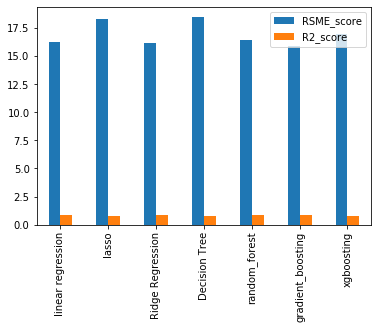

In [38]:
df1.plot(kind='bar')

In [41]:
from pandas import DataFrame,Series
col={'test':y_test, 'Predictions':y_pred_gbr}
df3=DataFrame(data=col)
df3

test  Predictions
6     921   928.667927
158   979   993.029044
71    881   888.534613
106   924   921.942179
12    922   935.972400
42    944   947.494159
93    979   965.483935
3     939   940.761266
41    958   947.450509
134   990   995.613790
48    944   922.976803
23    924   933.888031
54    912   923.216183
170   972   992.272587
115   900   913.385666
35    964   971.695566
149   967   959.052869
13    955   940.311344
25    932   943.683684
173   999   995.910398
112   908   923.570362
127  1074  1004.006977
29    935   926.442071
2     945   946.741093
45    956   928.338488
175   985   989.922317
144   991   981.835306
123   952   943.210898
160  1002   996.126564
53    913   911.526856
65    904   903.089360
171   967   965.765585
5     925   930.082471
109   897   911.762390
11    924   933.050681
24    923   929.747887
128  1009   995.515570